In [1]:
#Import the required libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pyemma
from copy import deepcopy
import numpy as np
import physt
import os
import scipy.optimize
import scipy.integrate
import pandas
import matplotlib.image as mpi

print(os.getcwd())

/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)
/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/media/ebeyerle/ducks2/1mus/0.2ps_step


In [2]:
def stretch(x,a,b):
    return np.exp(-(x/a)**b)

In [ ]:
#Integrate the mode autocorrelation functions to find a correlation time

integrals = np.zeros(72)
for a in range(4,76):
    acf4 = np.loadtxt('mode_corr_'+str(a))
    first_zero = np.where(acf4[:,1] <= 0)[0][0]
    integrals[a - 4] = scipy.integrate.trapz(acf4[:first_zero,1],x=acf4[:first_zero,0])
    print(integrals[a -4])
    
np.savetxt('mode_corr_integrals.dat',integrals)

8888.319797609996
8131.57922012999
8142.034353008372
9844.636959335441
8968.236650665269
44206.56183185728
5060.563612357937
5924.311045630037
2107.919368060592
2119.26784598185
1700.070712366486
3621.6653262170307
4564.856980741831
15271.675819676675
4318.911591723375
2541.957688499057
1878.2992802650617
2968.62230732313
4859.85568343188
1212.4121000032446
1326.6210556103588
3182.2463703309695
972.6889771677803
2066.957488465694
4231.604796963147
1879.2964333022874
1332.5285929810343
2369.39636174967
1680.936451700223
5587.4038743625115
543.0441568751272
4048.738935757984
1344.1196075459984
1000.9834177199414
1889.7347626564986
847.328066863467
594.1966538222981
1007.924510719061
790.0847641713223
514.1976206825086
2249.754769730918
634.0416484294188
1358.0666358284043
945.6552856850343
910.5975396615811
2467.376897714456
711.3775828972749
532.62693984398
563.0450227188718
1022.9696186105077


In [ ]:
tau_scaled = np.loadtxt('tau_scaled.dat')[:,1]
tau = np.loadtxt('tau.dat')[:,1]

In [ ]:
#Fit power laws to the decays

plt.plot(np.arange(4,76),tau[3:],lw=0.5,marker='o',ls='--',c='k',label='LE4PD')
params,params_covar = scipy.optimize.curve_fit(pfunc,np.arange(4,12),tau[3:11])

print(params)
plt.plot(np.arange(4,12),params[0]*(np.arange(4,12))**(-params[1]),lw=2,c='c')

params,params_covar = scipy.optimize.curve_fit(pfunc,np.arange(11,76),tau[10:])

print(params)
plt.plot(np.arange(4,76),params[0]*(np.arange(4,76))**(-params[1]),lw=2,c='m')

plt.plot(np.arange(4,76),tau_scaled[3:],lw=0.5,marker='o',ls='--',c='r',label='LE4PD-MAD')
params,params_covar = scipy.optimize.curve_fit(pfunc,np.arange(4,12),tau_scaled[3:11])

print(params)
plt.plot(np.arange(4,12),params[0]*(np.arange(4,12))**(-params[1]),lw=2,c='c')

params,params_covar = scipy.optimize.curve_fit(pfunc,np.arange(11,76),tau_scaled[10:])

print(params)
plt.plot(np.arange(4,76),params[0]*(np.arange(4,76))**(-params[1]),lw=2,c='m')

plt.plot(np.arange(4,76),integrals,lw=0.5,marker='o',ls='--',c='b',label='ACF integral')
params,params_covar = scipy.optimize.curve_fit(pfunc,np.arange(4,76),integrals)

print(params)
plt.plot(np.arange(4,76),params[0]*(np.arange(4,76))**(-params[1]),lw=2,c='k')

plt.xlabel('mode, a',fontsize=16)
plt.ylabel(r'$\tau$, ps',fontsize=16)
plt.xticks([4,10,20,30,40,50,60,70],size=12)
plt.yticks(size=12)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
plt.close()

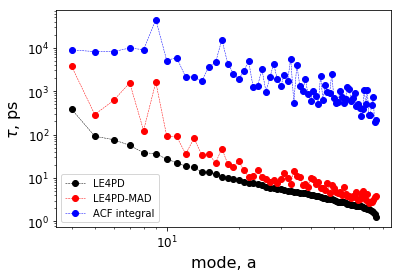

In [4]:
plt.plot(np.arange(4,76),tau[3:],lw=0.5,marker='o',ls='--',c='k',label='LE4PD')
plt.plot(np.arange(4,76),tau_scaled[3:],lw=0.5,marker='o',ls='--',c='r',label='LE4PD-MAD')
plt.plot(np.arange(4,76),integrals,lw=0.5,marker='o',ls='--',c='b',label='ACF integral')
plt.xlabel('mode, a',fontsize=16)
plt.ylabel(r'$\tau$, ps',fontsize=16)
plt.xticks([4,10,20,30,40,50,60,70],size=12)
plt.yticks(size=12)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()
plt.close()

In [5]:
tau = np.loadtxt('tau.dat')[:,1]

In [10]:
acf_msm = np.loadtxt('acf_xi_4_msm.dat')
acf4 = np.loadtxt('mode_corr_4')

In [15]:
#Test interpolation scheme for the first internal mode
#20 ps -> 250 ps (?)

x0 = 20
x1 = 250
y0 = np.exp(-20/tau[3])
y1 = acf_msm[np.where(acf_msm[:,0] == x1)[0][0]][1]
xaxis = np.linspace(x0,x1,100)
yinter = y0*(y1/y0)**((xaxis - x0)/(x1 - x0))
linter = y0 + (y1 - y0)*((xaxis - x0)/(x1 - x0))

In [12]:
step = 0.2
taxis1 = acf4[:int(x0/step),0]
taxis2 = acf_msm[np.where(acf_msm[:,0] == x1)[0][0]:,0]

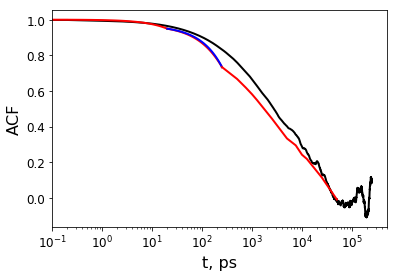

In [17]:
plt.plot(acf4[:,0],acf4[:,1],lw=2,c='k')
plt.plot(taxis1,np.exp(-taxis1/tau[3]),lw=2,c='r')
plt.plot(xaxis,yinter,lw=2,c='r')
plt.plot(xaxis,linter,lw=2,c='b')
plt.plot(taxis2,acf_msm[np.where(acf_msm[:,0] == x1)[0][0]:,1],lw=2,c='r')
plt.xlabel('t, ps',fontsize=16)
plt.ylabel(r'ACF',fontsize=16)
plt.xticks(size=12)
plt.yticks(size=12)
#plt.yscale('log')
plt.xscale('log')
plt.show()
plt.close()